In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Reading data

In [3]:
con = sqlite3.connect('password_data.sqlite')    # Opens a connection to SQLite db file

In [4]:
df = pd.read_sql_query('SELECT * FROM Users' , con)
df.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


In [5]:
df.shape

(100000, 3)

In [6]:
df.columns

Index(['index', 'password', 'strength'], dtype='object')

In [7]:
df.drop('index' , axis=1 , inplace=True)
df.head()

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


Dropped 'index' column as it is of no use

In [9]:
df.duplicated().sum()

0

No duplicate values available

In [11]:
df.isnull().sum()

password    0
strength    0
dtype: int64

No missing values are there

In [13]:
df.dtypes

password    object
strength     int64
dtype: object

In [14]:
df['strength'].unique()

array([1, 2, 0], dtype=int64)

# Semantic Analysis

In [16]:
df['password'].str.isnumeric().sum()

26

26 people have only numeric values as their password , and the rows are given below

In [18]:
df[df['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [19]:
df['password'].str.isupper().sum()

1506

1506 people have only uppercase alphabets with number or special character

In [21]:
df['password'].str.isalpha().sum()

50

50 persons have only alphabets in their password

In [23]:
df['password'].str.isalnum().sum()

97203

In [24]:
df['password'].str.isalnum().sum()/len(df)

0.97203

Almost 97.2% people have both aplhabet and numbers in their password

In [26]:
df['password'].str.istitle().sum()

932

932 people have their first character as capital

In [28]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
def find_special_char(x):
    for i in x:
        if i in string.punctuation:
            return 1
    return 0

In [30]:
df['password'].apply(find_special_char).sum()

2663

2663 people have special characters in their passwords

# Feature Engineering

In [33]:
df['length'] = df['password'].str.len()
df.head()

,password,strength,length
0,zxe870819,1,9
1,xw46454nr23l,1,12
2,soporte13,1,9
3,accounts6000webhost.com,2,23
4,c443balg,1,8


For finding percentage of lower case characters in password

In [35]:
def lowercase_freq(x):
    return np.round(len([char for char in x if char.islower()])/len(x) , 3)

In [36]:
df['lowercase_freq'] = df['password'].apply(lowercase_freq)
df.head()

,password,strength,length,lowercase_freq
0,zxe870819,1,9,0.333
1,xw46454nr23l,1,12,0.417
2,soporte13,1,9,0.778
3,accounts6000webhost.com,2,23,0.783
4,c443balg,1,8,0.625


Similarly for uppercase and numbers

In [38]:
def uppercase_freq(x):
    return np.round(len([char for char in x if char.isupper()])/len(x) ,3 )

def number_freq(x):
    return np.round(len([char for char in x if char.isnumeric()])/len(x) , 3)


df['uppercase_freq'] = df['password'].apply(uppercase_freq)
df['num_freq'] = df['password'].apply(number_freq)
df.head()

,password,strength,length,lowercase_freq,uppercase_freq,num_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222
3,accounts6000webhost.com,2,23,0.783,0.0,0.174
4,c443balg,1,8,0.625,0.0,0.375


In [39]:
def specialchar_freq(x):
    l = 0
    for char in x:
        l += char.isalnum()
    return np.round((len(x)-l)/len(x) , 3)

df['specialchar_freq'] = df['password'].apply(specialchar_freq)
df.head()

,password,strength,length,lowercase_freq,uppercase_freq,num_freq,specialchar_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000


Data Analysis

In [41]:
for col in df.columns[2:]:
    print(f'Analysis of {col}')
    print(df[[col , 'strength']].groupby(['strength']).agg(['min' , 'max' , 'mean' , 'median']))
    print('\n')
    print('-'*50)
    print('\n')

Analysis of length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


--------------------------------------------------


Analysis of lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


--------------------------------------------------


Analysis of uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


-----

<Axes: ylabel='length'>

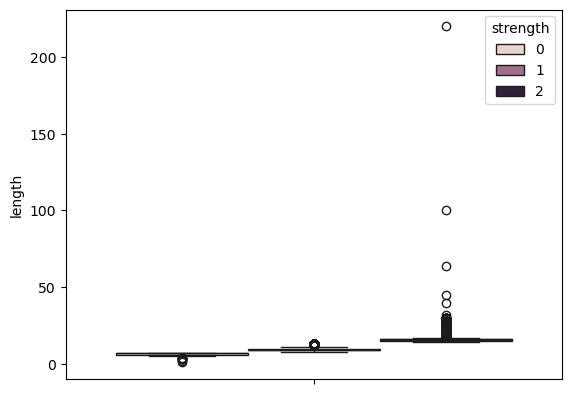

In [42]:
sns.boxplot(y=df['length'] , hue=df['strength'])

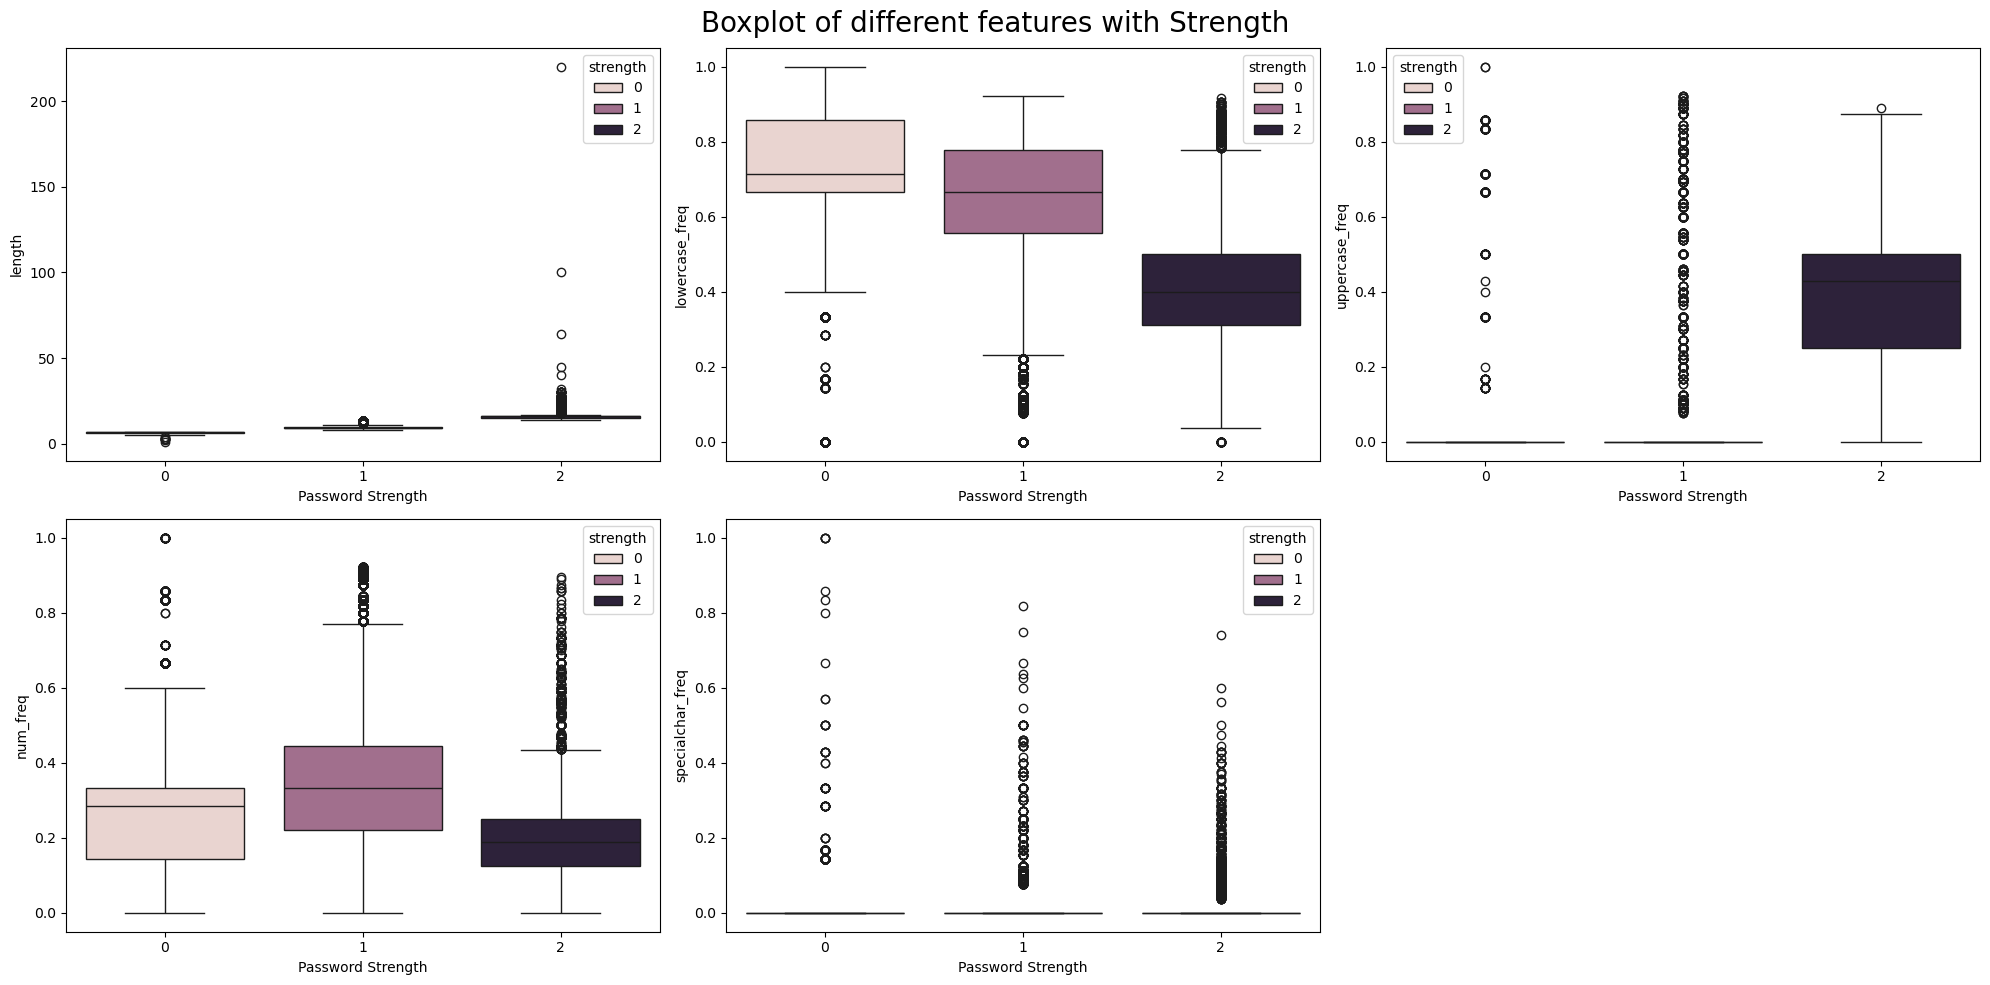

In [43]:
plt.figure(figsize=(20,10))
plt.suptitle('Boxplot of different features with Strength' , fontsize=20)
for i in range(len(df.columns[2:])):
    plt.subplot(2 , 3 , i+1)
    sns.boxplot(y=df[df.columns[i+2]] , x=df['strength'] , hue=df['strength'])
    plt.xlabel('Password Strength')
    plt.tight_layout()

In [44]:
from warnings import filterwarnings
filterwarnings('ignore')

In [45]:
def get_violin_dist(data , col):
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    sns.violinplot(data=data , x='strength' , y=col)

    plt.subplot(1,2,2)
    sns.distplot(data[data['strength']==0][col] , color='yellow' , hist=False)
    sns.distplot(data[data['strength']==1][col] , color='blue' , hist=False)
    sns.distplot(data[data['strength']==2][col] , color='green' , hist=False)

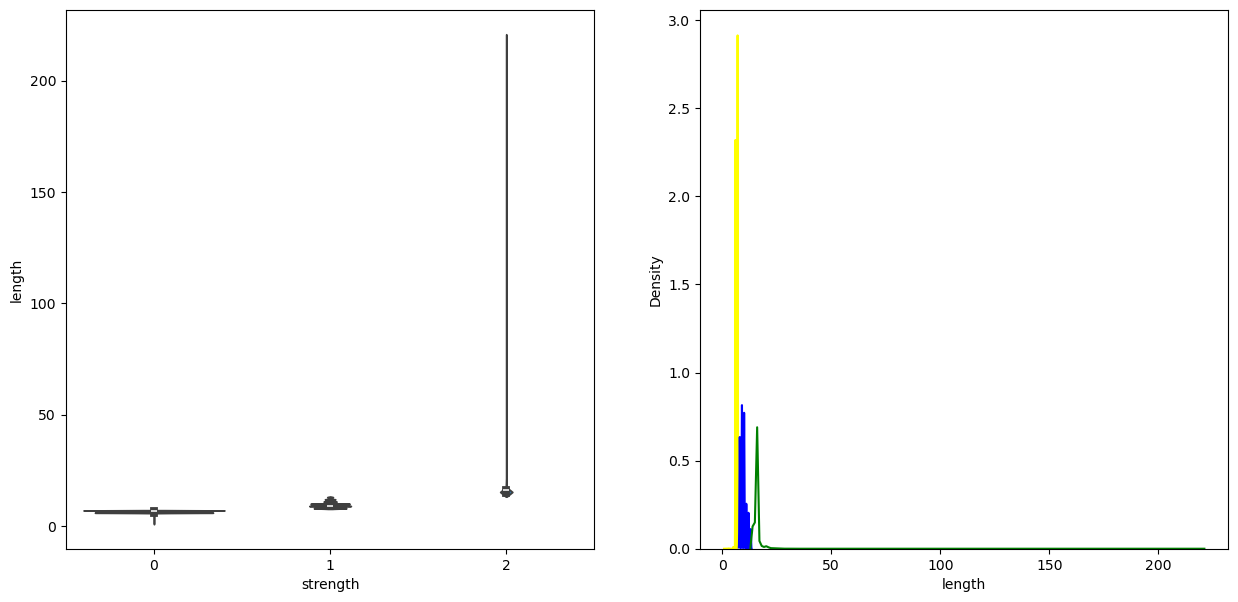

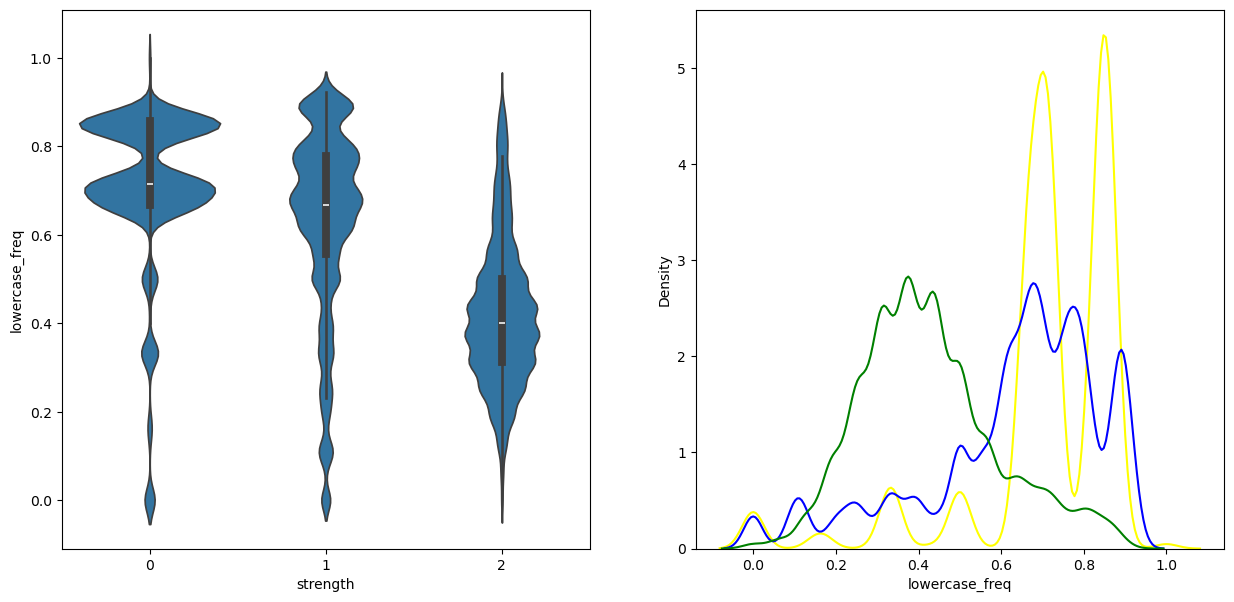

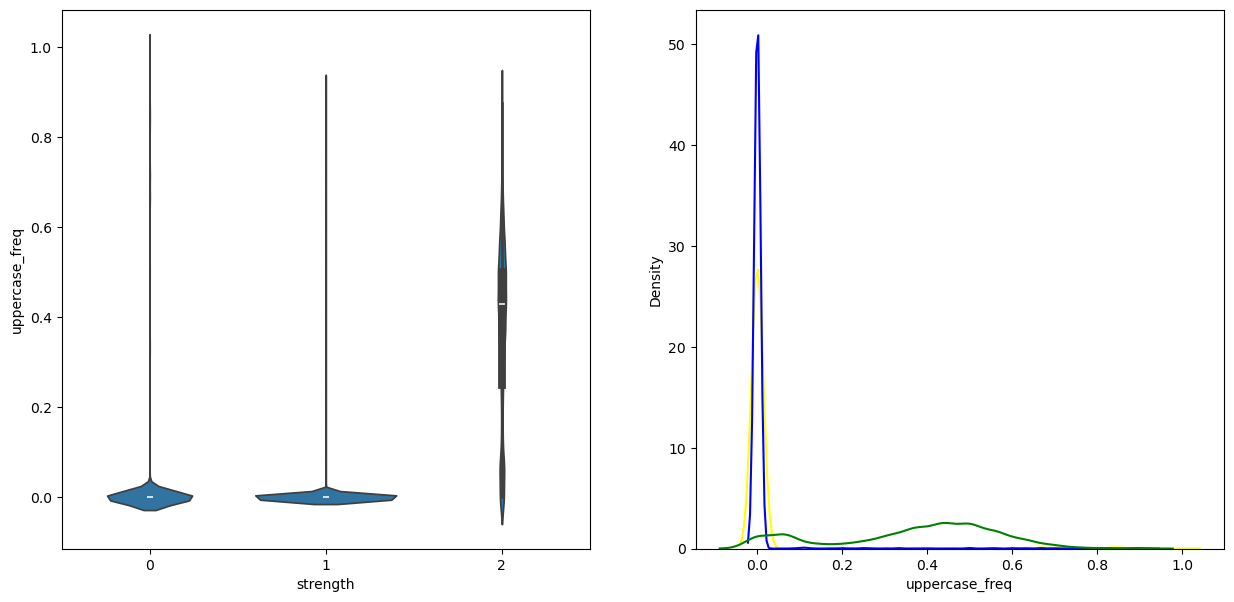

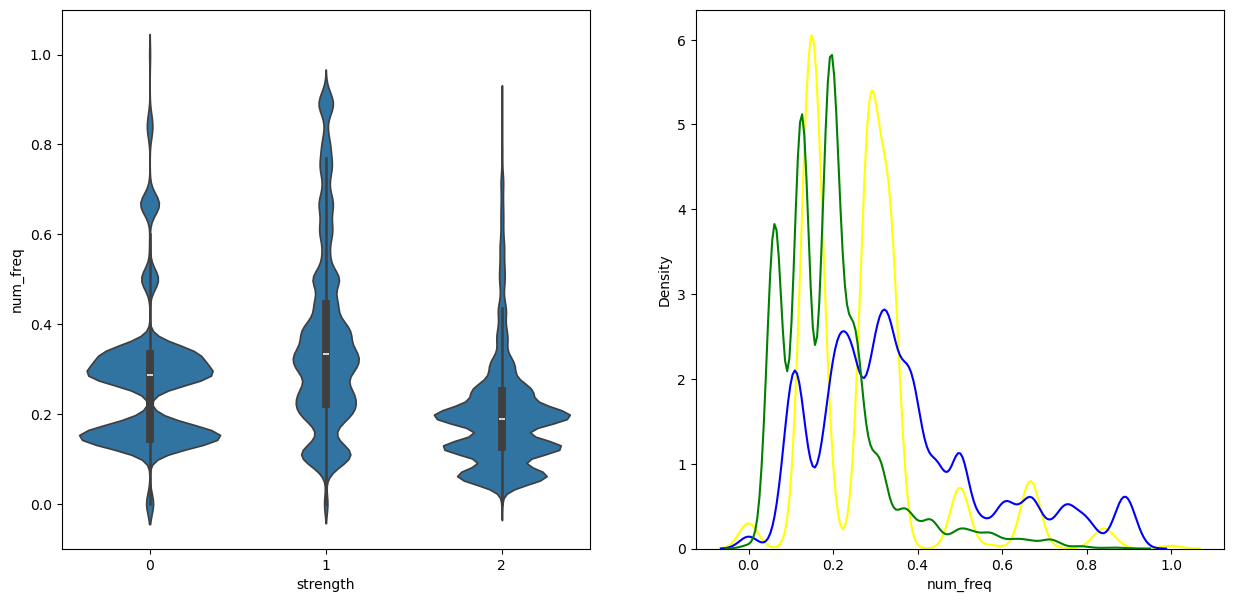

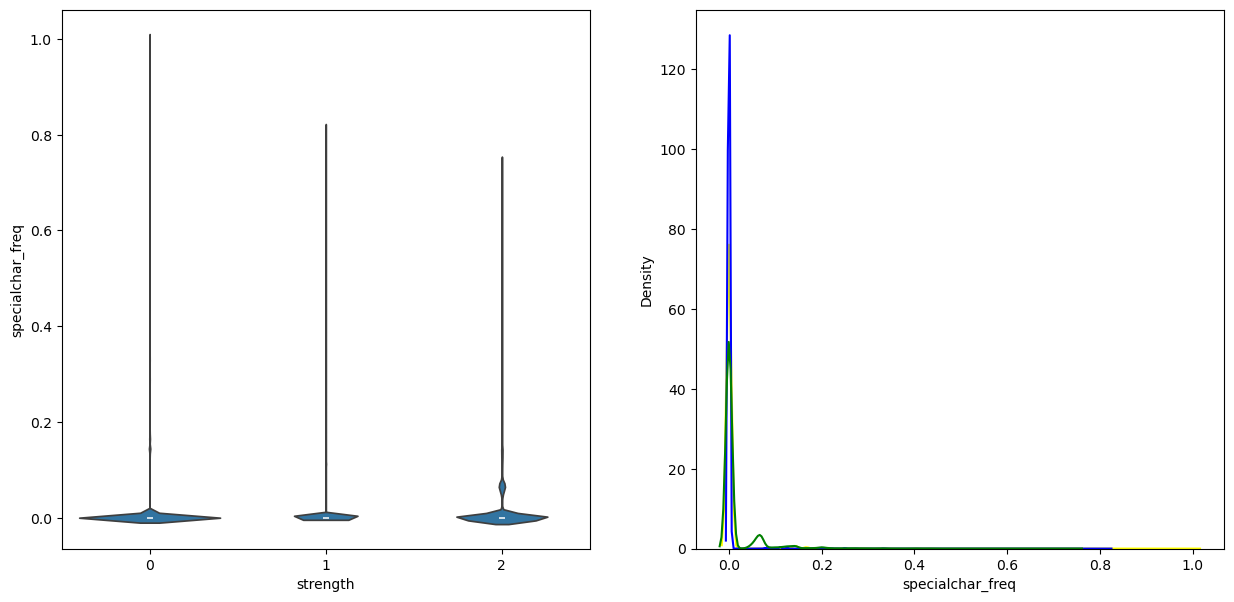

In [46]:
for col in df.columns[2:]:
    get_violin_dist(df , col)

In [47]:
# Shuffling data
df_shuffled = df.sample(frac=1)
df_shuffled

,password,strength,length,lowercase_freq,uppercase_freq,num_freq,specialchar_freq
52974,glauco2012,1,10,0.600,0.000,0.400,0.0
63288,ghosts1,0,7,0.857,0.000,0.143,0.0
20454,UUcuoCjg0OAhkI53,2,16,0.438,0.375,0.188,0.0
49754,ubulob252,1,9,0.667,0.000,0.333,0.0
13693,cvrtuz69,1,8,0.750,0.000,0.250,0.0
...,...,...,...,...,...,...,...
26361,maryem2410,1,10,0.600,0.000,0.400,0.0
58668,zuqujoxa10,1,10,0.800,0.000,0.200,0.0
26822,dpgcme1,0,7,0.857,0.000,0.143,0.0
2600,mlrsadzhi1,1,10,0.900,0.000,0.100,0.0


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='char')

In [49]:
X = vectorizer.fit_transform(list(df_shuffled['password']))       # it takes list as input
X.shape       

(100000, 99)

We can observe that every password is represented using 99 dimensions

In [51]:
X       # X is a sparse matrix

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [52]:
X.toarray()[0]        # First password is represented as this vector

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.30026516, 0.23035794, 0.53302593, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.22184296, 0.        , 0.34747645,
       0.        , 0.        , 0.        , 0.35214931, 0.        ,
       0.        , 0.        , 0.        , 0.31990304, 0.        ,
       0.        , 0.27259328, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.3194543 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [53]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [54]:
len(vectorizer.get_feature_names_out())

99

These are the 99 features

In [56]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
df_final = pd.concat([df2 , df_shuffled.iloc[:,2:]] , axis=1)
df_final

,,,,,,,,,!,#,...,ú,ü,ý,þ,›,length,lowercase_freq,uppercase_freq,num_freq,specialchar_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9,0.333,0.0,0.667,0.000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12,0.417,0.0,0.583,0.000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9,0.778,0.0,0.222,0.000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,23,0.783,0.0,0.174,0.043
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8,0.625,0.0,0.375,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10,0.700,0.0,0.300,0.000
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10,0.800,0.0,0.200,0.000
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9,0.778,0.0,0.222,0.000
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9,0.667,0.0,0.333,0.000


In [58]:
y = df['strength']
y.head()

0    1
1    1
2    1
3    2
4    1
Name: strength, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df_final , y , test_size=0.2 , random_state=10)
X_train.shape , y_train.shape

((80000, 104), (80000,))

In [60]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial')
clf.fit(X_train ,y_train)

LogisticRegression(multi_class='multinomial')

In [61]:
y_pred = clf.predict(X_test)
y_pred

array([1, 2, 1, ..., 1, 1, 0], dtype=int64)

Prediction

In [63]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
print(f'accuracy of model is : {accuracy_score(y_test , y_pred)}')
print(f'Confusion Matrix : \n {confusion_matrix(y_test , y_pred)}')

accuracy of model is : 0.9993
Confusion Matrix : 
 [[ 2773     5     0]
 [    0 14735     6]
 [    0     3  2478]]


In [64]:
print(f'CLassification Report : \n {classification_report(y_test , y_pred)}')

CLassification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2778
           1       1.00      1.00      1.00     14741
           2       1.00      1.00      1.00      2481

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [65]:
password = '@123abc'
sample_array = np.array([password])
sample_matrix = vectorizer.transform(sample_array)
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.21630818, 0.25025808, 0.28029014, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.73499378, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.20831254, 0.34921081, 0.32628353,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [66]:
len(password) , lowercase_freq(password) , uppercase_freq(password) , number_freq(password) , specialchar_freq(password)

(7, 0.429, 0.0, 0.429, 0.143)

In [67]:
lowercase_len = len([char for char in password if char.islower()])/len(password)
new_mat = np.append(sample_matrix.toarray() , (len(password) , lowercase_freq(password) , uppercase_freq(password) , 
                                     number_freq(password) , specialchar_freq(password)))
new_mat

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.21630818, 0.25025808, 0.28029014, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.73499378, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.20831254, 0.34921081, 0.32628353,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [68]:
new_mat.shape

(104,)

In [69]:
new_mat = new_mat.reshape(1,104)
new_mat.shape

(1, 104)

In [70]:
clf.predict(new_mat)

array([0], dtype=int64)

So it is a weak password

In [72]:
def predict():
    password = input('Enter your password : ')
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    length = len(password)
    lowercase = lowercase_freq(password)
    uppercase = uppercase_freq(password)
    numbers = number_freq(password)
    specialchar = specialchar_freq(password)
    new_mat = np.append(sample_matrix.toarray() , (length , lowercase , uppercase , numbers , specialchar))
    new_mat = new_mat.reshape(1,104)
    result = clf.predict(new_mat)

    if result==0:
        return 'Password is weak'
    elif result==1:
        return 'Password is normal'
    else:
        return 'Password is strong'

In [73]:
predict()

Enter your password :  Vishu123456#


'Password is normal'

In [74]:
from sklearn.svm import SVC
nb = SVC()
nb.fit(X_train , y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test , y_pred)

1.0

In [75]:
import pickle
pickle.dump(clf , open('model.pkl' , mode='wb'))

In [133]:
pickle.dump(vectorizer , open('vectorizer.pkl' , 'wb'))